In [1]:
from plot_functions import *
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
st = pd.HDFStore("transfer.h5", mode='r')

In [3]:
transfer_mean = st['/transfer_mean']
transfer_std = st['/transfer_sd']

In [4]:
normal_mean = st['/normal_mean']
normal_std = st['/normal_sd']

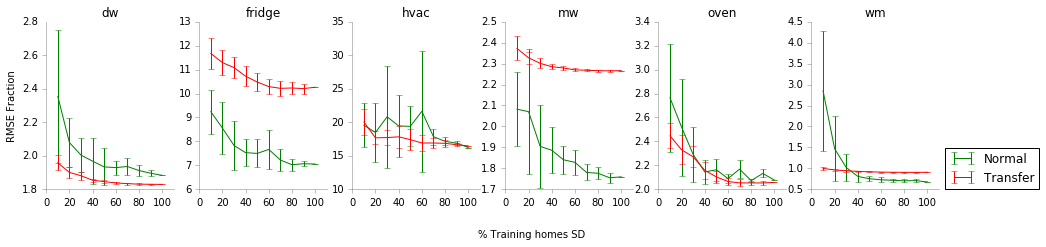

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(16, 3))
for i, a in enumerate(ax):
    appliance = normal_mean.columns[i]
    ax[i].set_title(appliance)
    normal_mean[appliance].plot( yerr=normal_std[appliance], xlim=(0, 110), colors='g',legend=False, ax=ax[i])
    transfer_mean[appliance].plot( yerr=transfer_std[appliance], xlim=(0, 110), colors='r', ax=ax[i], legend=False)
    format_axes(a)
ax[0].set_ylabel("RMSE Fraction")
fig.text(0.5, -0.1, '% Training homes SD')
ax[-1].legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0., labels=['Normal', 'Transfer'])


In [24]:
import pickle

In [29]:
transfer_pred_overall = pickle.load(open("predictions/transfer_pred.pkl",'r'))
normal_pred_overall = pickle.load(open("predictions/normal_pred.pkl",'r'))


In [26]:
from create_matrix import *

df, dfc = create_matrix_single_region("SanDiego", 2014)


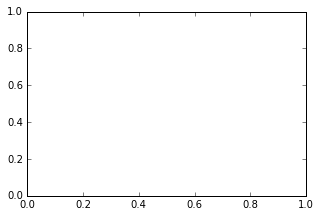

In [95]:
appliance="hvac"

gt_appliance = df[['%s_%d' %(appliance, month) for month in range(1, 13)]]
gt_appliance.columns = range(12)


from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots(figsize=(5, 3.3))


def update(f):
    random_seed=2
    ax.cla()
    gt_appliance.mean().plot(label='GT', ax=ax)


    prediction_transfer = pd.concat(transfer_pred_overall[random_seed][appliance][f]).ix[df.index]
    prediction_normal = pd.concat(normal_pred_overall[random_seed][appliance][f]).ix[df.index]
    prediction_normal.mean().plot(label='Normal', ax=ax)

    prediction_transfer.mean().plot(label='Transfer', ax=ax)
   
    ax.legend(loc=8, mode="expand", ncol=3)
    
    ax.set_xlabel("Month")
    ax.set_ylabel("Energy")
    #ax.set_ylim((0, 75))
    ax.set_title("{}% SD train data".format(f))
    format_axes(ax)
    




In [96]:
anim = FuncAnimation(fig, update, frames=range(10, 110, 10), interval=500)
anim.save('predictions/%s.gif' %appliance, dpi=100, writer='imagemagick')

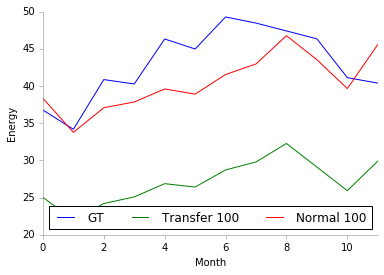

In [61]:


f = 100
random_seed=2

gt_appliance.mean().plot(label='GT')

  
prediction_transfer = pd.concat(transfer_pred_overall[random_seed][appliance][f]).ix[df.index]
prediction_normal = pd.concat(normal_pred_overall[random_seed][appliance][f]).ix[df.index]

prediction_transfer.mean().plot(label='Transfer '+str(f))
prediction_normal.mean().plot(label='Normal '+str(f))
plt.xlabel("Month")
plt.ylabel("Energy")
plt.legend(loc=8, mode="expand", ncol=3)
format_axes(plt.gca())
